# Time Series

Simply put, a time series is any data put into chronological order.  Time Series Analysis therefore is simply an analysis of how a subject has behaved over time.

In [1]:
# The built-in Nile object is a dataset recording the measurements of the annual flow of the Nile river.
# It's class is "ts," for time series.
# Using the print() function on a time series object,
# we can examine the start date, and end date, as well as the measurements.
print(Nile)

Time Series:
Start = 1871 
End = 1970 
Frequency = 1 
  [1] 1120 1160  963 1210 1160 1160  813 1230 1370 1140  995  935 1110  994 1020
 [16]  960 1180  799  958 1140 1100 1210 1150 1250 1260 1220 1030 1100  774  840
 [31]  874  694  940  833  701  916  692 1020 1050  969  831  726  456  824  702
 [46] 1120 1100  832  764  821  768  845  864  862  698  845  744  796 1040  759
 [61]  781  865  845  944  984  897  822 1010  771  676  649  846  812  742  801
 [76] 1040  860  874  848  890  744  749  838 1050  918  986  797  923  975  815
 [91] 1020  906  901 1170  912  746  919  718  714  740


In [2]:
# Similarly to dataframes, we can view other metadata about this time series
length(Nile)
head(Nile, 5)
tail(Nile, 5)

# Right off the bat, we can already see that the last few values are much less than the first few.

[1] 100

[1] 1120 1160  963 1210 1160

[1] 746 919 718 714 740

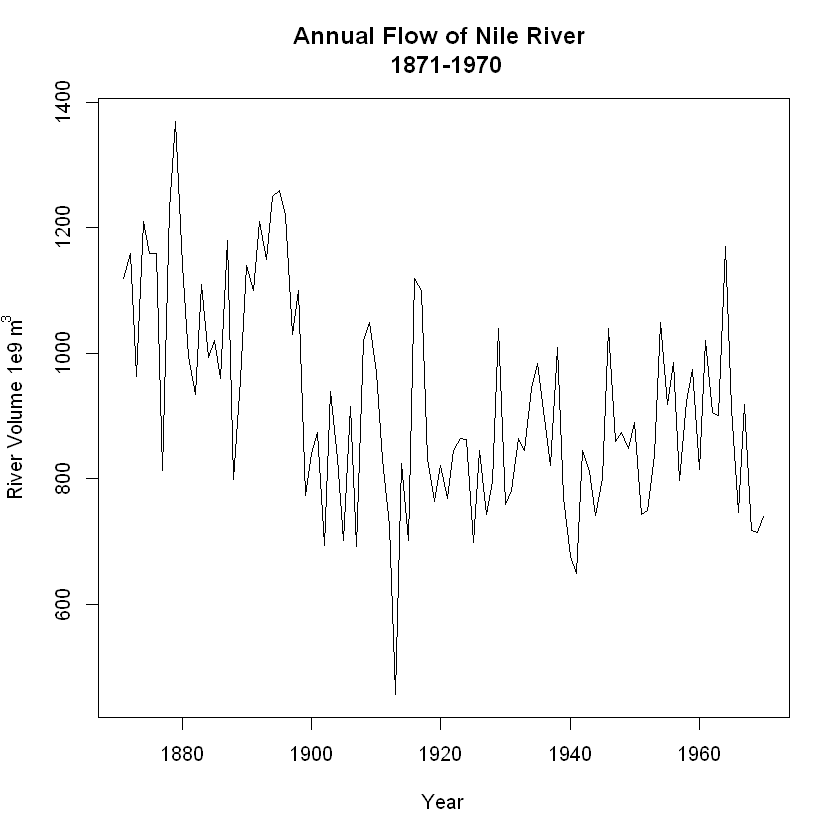

In [3]:
# Is it also useful to visualize your time series before digging any deeper.
plot(Nile, xlab="Year", ylab= expression('River Volume 1e9 m'^3) , main="Annual Flow of Nile River \n 1871-1970")

# Descriptive Information about Time Series

Time series data can come in a variety of formats.  Among these are:

1. Data that is exactly evenly-spaced, such as the temperature at every hour.
2. Data that is approximately evenly-spaced, such as the temperature recorded every time you stand up from your desk.
3. Data that is evenly spaced, but with missing values, such as the temperature recorded, but only during working hours.  This would give us a few consecutive hours, then a large pause, then another set of consecutive values, and so on.

Time series analysis begins with a few assumptions:
1. Consecutive observations are evenly-spaced.
2. A discrete time-observation index is used. 

In practice, this may only hold approximately.  Depending on the circumstances, we can sometimes ignore small discrepancies and perform our analysis as if the frequencies were exact.

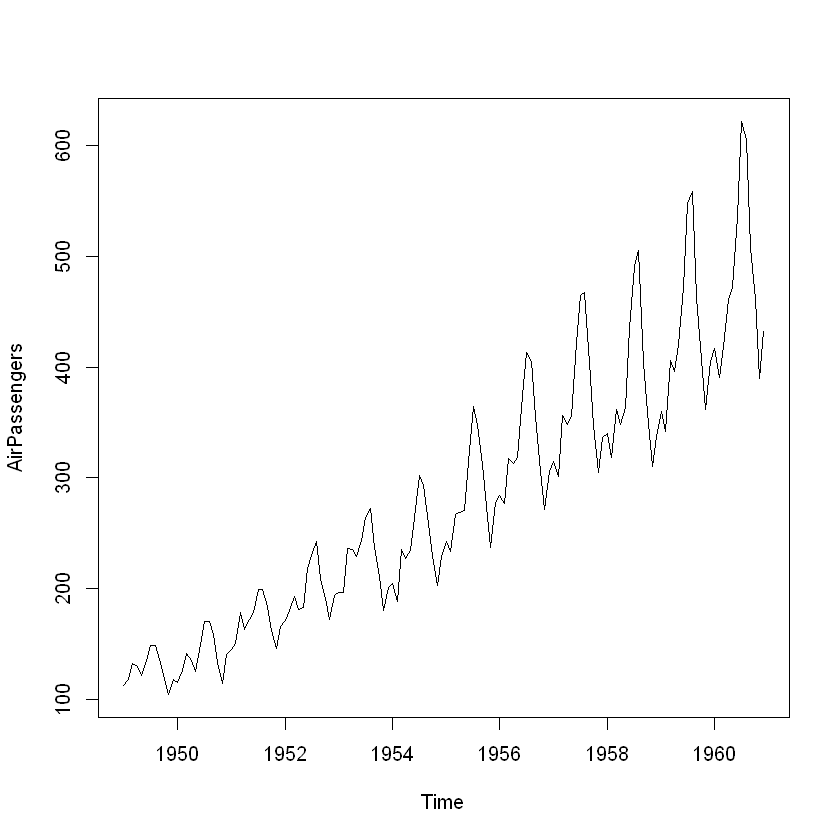

In [4]:
# Consider the AirPassengers dataset,
# which records the total international airline passengers in thousands by month
plot(AirPassengers)

In [5]:
# The frequency function returns the number of samples per unit time
frequency(AirPassengers)
# We can see that in this dataset, each unit time has twelve observations; in this case, twelve months.

# The start() function returns the time index of the first observation.
# The end() function returns the time index of the last observation.
start(AirPassengers)
end(AirPassengers)
# We can see that the first observation is the first month of the year 1949,
# and the last observation is the twelfth month of the year 1960.

# The deltat() function returns the time interval between each observation.
deltat(AirPassengers)
# In our case, we are breaking down observations by month.
# Therefore, we have 1/12 = 0.083 observations within each year; this is the deltat value.

[1] 12

[1] 1949    1

[1] 1960   12

[1] 0.08333333

In [6]:
# The time() function returns a vector of times at which each observation was sampled.
time(AirPassengers)
# Our first observation in 1949 was recorded at 1949.00, followed by 1949.083, then 1949.0167, etc.

# Lastly, the cycle() function returns the position in the cycle for each observation.
# Since our example is monthly, we have a cycle of one year,
# where January is the first position; February is the second, and so on.
cycle(AirPassengers)

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,1949.000,1949.083,1949.167,1949.250,1949.333,1949.417,1949.500,1949.583,1949.667,1949.750,1949.833,1949.917
1950,1950.000,1950.083,1950.167,1950.250,1950.333,1950.417,1950.500,1950.583,1950.667,1950.750,1950.833,1950.917
1951,1951.000,1951.083,1951.167,1951.250,1951.333,1951.417,1951.500,1951.583,1951.667,1951.750,1951.833,1951.917
1952,1952.000,1952.083,1952.167,1952.250,1952.333,1952.417,1952.500,1952.583,1952.667,1952.750,1952.833,1952.917
1953,1953.000,1953.083,1953.167,1953.250,1953.333,1953.417,1953.500,1953.583,1953.667,1953.750,1953.833,1953.917
1954,1954.000,1954.083,1954.167,1954.250,1954.333,1954.417,1954.500,1954.583,1954.667,1954.750,1954.833,1954.917
1955,1955.000,1955.083,1955.167,1955.250,1955.333,1955.417,1955.500,1955.583,1955.667,1955.750,1955.833,1955.917
1956,1956.000,1956.083,1956.167,1956.250,1956.333,1956.417,1956.500,1956.583,1956.667,1956.750,1956.833,1956.917
1957,1957.000,1957.083,1957.167,1957.250,1957.333,1957.417,1957.500,1957.583,1957.667,1957.750,1957.833,1957.917
1958,1958.000,1958.083,1958.167,1958.250,1958.333,1958.417,1958.500,1958.583,1958.667,1958.750,1958.833,1958.917


ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,1,2,3,4,5,6,7,8,9,10,11,12
1950,1,2,3,4,5,6,7,8,9,10,11,12
1951,1,2,3,4,5,6,7,8,9,10,11,12
1952,1,2,3,4,5,6,7,8,9,10,11,12
1953,1,2,3,4,5,6,7,8,9,10,11,12
1954,1,2,3,4,5,6,7,8,9,10,11,12
1955,1,2,3,4,5,6,7,8,9,10,11,12
1956,1,2,3,4,5,6,7,8,9,10,11,12
1957,1,2,3,4,5,6,7,8,9,10,11,12
1958,1,2,3,4,5,6,7,8,9,10,11,12


# Missing Data in Time Series

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


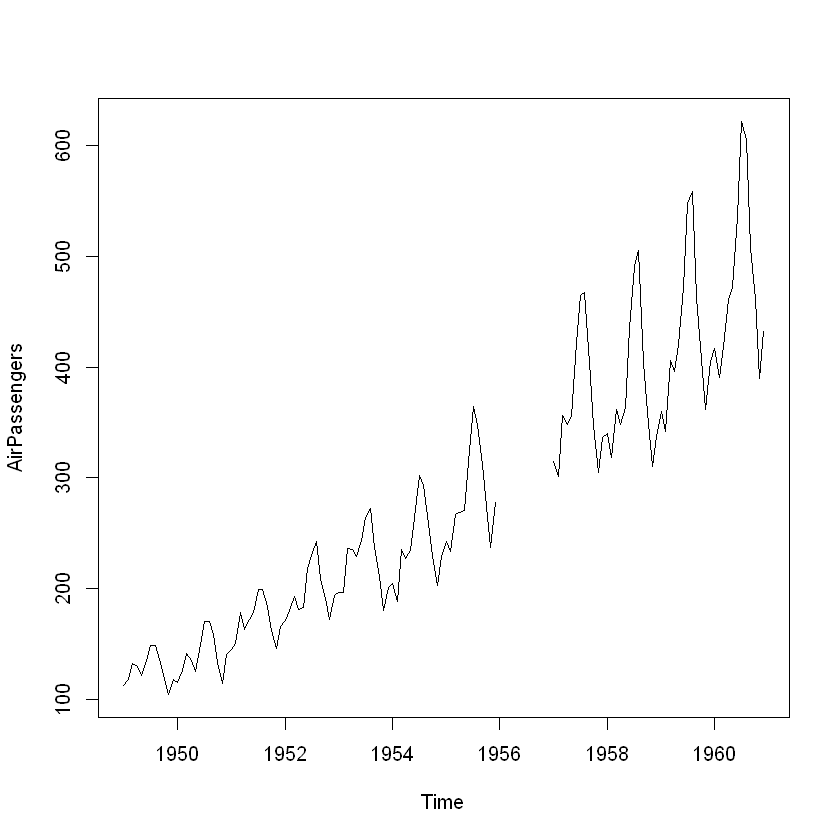

In [7]:
# Suppose were missing data from the year 1956
AirPassengers[85:96] <- NA
AirPassengers
plot(AirPassengers)

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112.0000,118.0000,132.0000,129.0000,121.0000,135.0000,148.0000,148.0000,136.0000,119.0000,104.0000,118.0000
1950,115.0000,126.0000,141.0000,135.0000,125.0000,149.0000,170.0000,170.0000,158.0000,133.0000,114.0000,140.0000
1951,145.0000,150.0000,178.0000,163.0000,172.0000,178.0000,199.0000,199.0000,184.0000,162.0000,146.0000,166.0000
1952,171.0000,180.0000,193.0000,181.0000,183.0000,218.0000,230.0000,242.0000,209.0000,191.0000,172.0000,194.0000
1953,196.0000,196.0000,236.0000,235.0000,229.0000,243.0000,264.0000,272.0000,237.0000,211.0000,180.0000,201.0000
1954,204.0000,188.0000,235.0000,227.0000,234.0000,264.0000,302.0000,293.0000,259.0000,229.0000,203.0000,229.0000
1955,242.0000,233.0000,267.0000,269.0000,270.0000,315.0000,364.0000,347.0000,312.0000,274.0000,237.0000,278.0000
1956,275.9394,275.9394,275.9394,275.9394,275.9394,275.9394,275.9394,275.9394,275.9394,275.9394,275.9394,275.9394
1957,315.0000,301.0000,356.0000,348.0000,355.0000,422.0000,465.0000,467.0000,404.0000,347.0000,305.0000,336.0000
1958,340.0000,318.0000,362.0000,348.0000,363.0000,435.0000,491.0000,505.0000,404.0000,359.0000,310.0000,337.0000


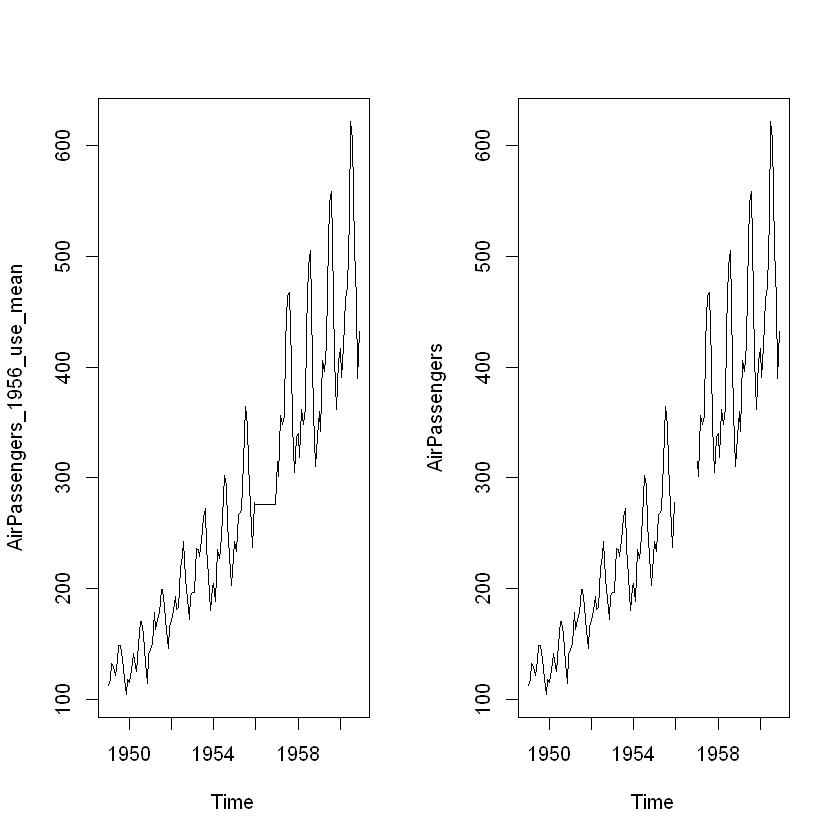

In [8]:
# In certain cases, we simply replace missing values with means, medians, or other types of averages.
AirPassengers_1956_use_mean <- AirPassengers
AirPassengers_1956_use_mean[85:96] <- mean(AirPassengers, na.rm = TRUE) # remove NA values, as this breaks the mean() function.
AirPassengers_1956_use_mean
par(mfrow=c(1,2))
plot(AirPassengers_1956_use_mean)
plot(AirPassengers)
# In our case, we can observe that the mean poorly reflects what existing data should look like.

# Time Series Objects

A time series has two components
1. Measures/Values- The value at a given point in time
2. Time- The point in time

Given a vector of values, we can apply the ts() function to create a time series object.  A object with class timeseries has these two properties.

[1] "numeric"

[1] "ts"

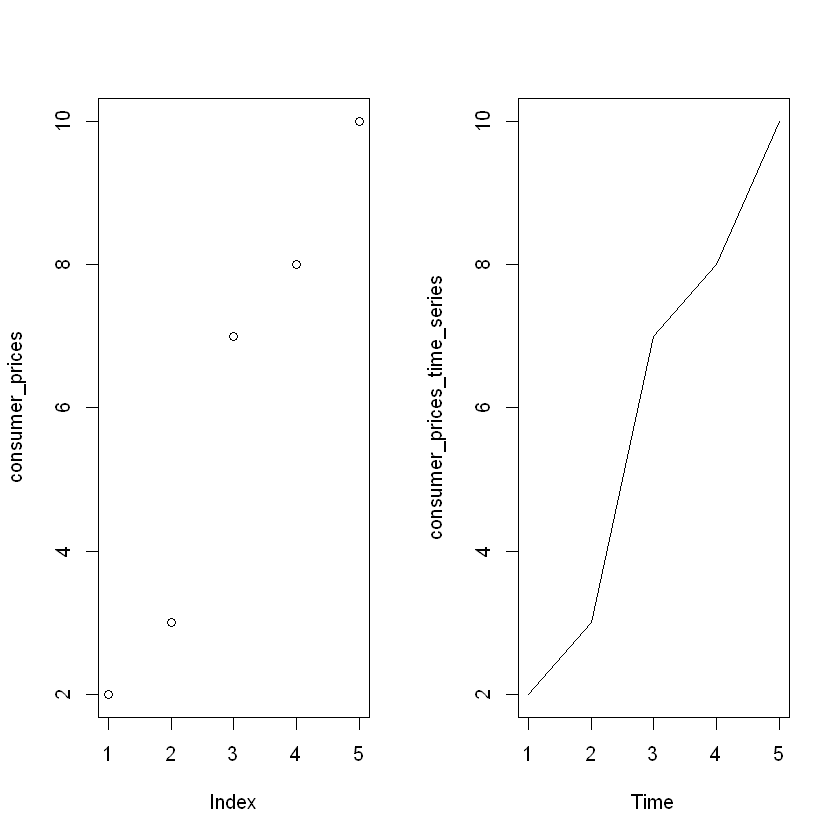

In [9]:
consumer_prices <- c(2, 3, 7, 8, 10)
class(consumer_prices)
consumer_prices_time_series <- ts(consumer_prices)
class(consumer_prices_time_series)
par(mfrow=c(1, 2))
plot(consumer_prices)
plot(consumer_prices_time_series)

##### Below we will generate a more detailed and realistic-looking dataset, and take a closer look at creating time series objects.

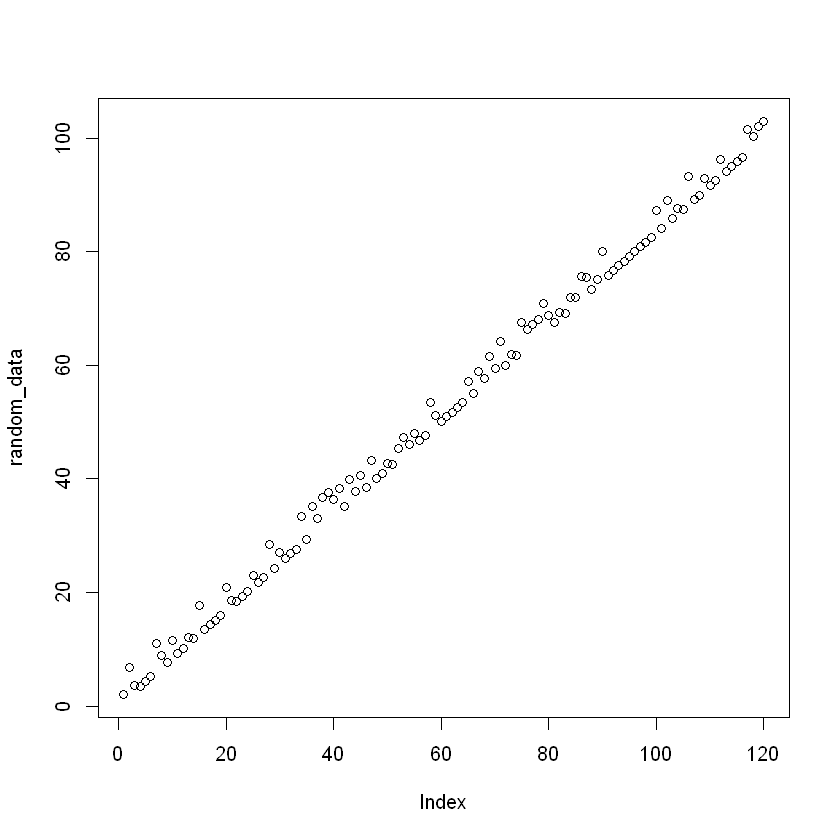

In [10]:
# Generate random data for observations each month over a ten-year period starting in 2001.
random_data <- seq(1, 100, length.out=120)

# Add random noise to each element.
for (data in 1:length(random_data)) {
    noise <- ifelse(rnorm(1)>=0, sample(5, 1), 0)
    random_data[data] <- random_data[data] + noise
}

plot(random_data)

In [11]:
# Convert random matrix to time series
class(random_data)
random_time_series <- ts(random_data)
class(random_time_series)

print(random_time_series)
# We are measuring by month; so we should have a frequency of 12.
# Our start date should be the first month of the year 2001, or: 2001 1
# Our end date should be the last month of the year 2010, or: 2010 12

[1] "numeric"

[1] "ts"

Time Series:
Start = 1 
End = 120 
Frequency = 1 
  [1]   2.000000   6.831933   3.663866   3.495798   4.327731   5.159664
  [7]  10.991597   8.823529   7.655462  11.487395   9.319328  10.151261
 [13]  11.983193  11.815126  17.647059  13.478992  14.310924  15.142857
 [19]  15.974790  20.806723  18.638655  18.470588  19.302521  20.134454
 [25]  22.966387  21.798319  22.630252  28.462185  24.294118  27.126050
 [31]  25.957983  26.789916  27.621849  33.453782  29.285714  35.117647
 [37]  32.949580  36.781513  37.613445  36.445378  38.277311  35.109244
 [43]  39.941176  37.773109  40.605042  38.436975  43.268908  40.100840
 [49]  40.932773  42.764706  42.596639  45.428571  47.260504  46.092437
 [55]  47.924370  46.756303  47.588235  53.420168  51.252101  50.084034
 [61]  50.915966  51.747899  52.579832  53.411765  57.243697  55.075630
 [67]  58.907563  57.739496  61.571429  59.403361  64.235294  60.067227
 [73]  61.899160  61.731092  67.563025  66.394958  67.226891  68.058824
 [79]  70.8907

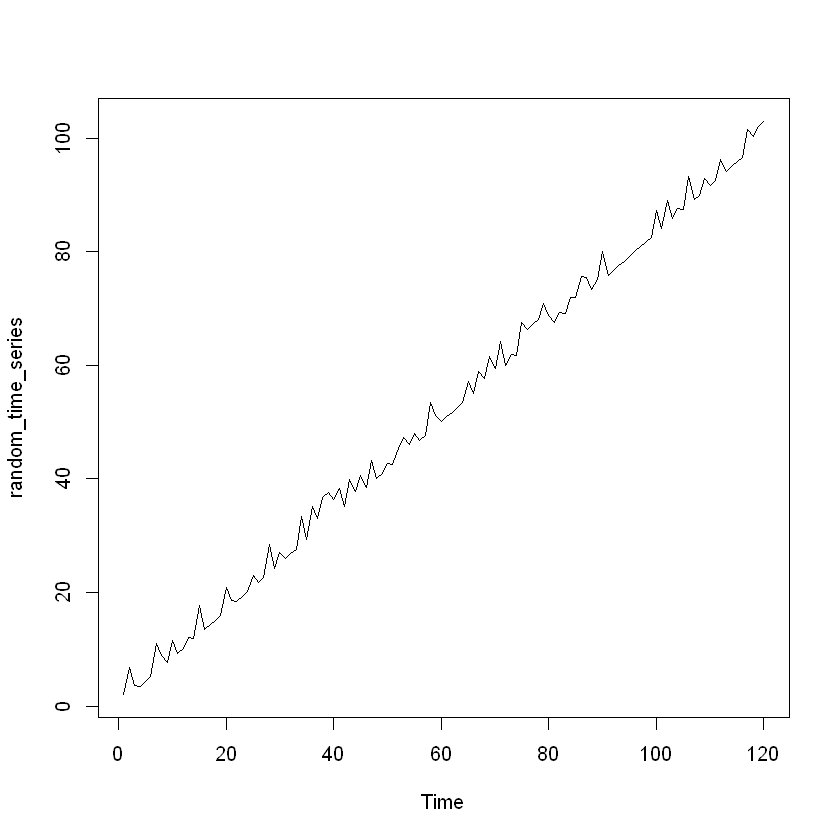

In [12]:
plot(random_time_series)

##### When we created a time time series object from our randomly generated data, the ts() function assumed a few default properties.  We stated that we are recording measurements each month over a ten-year period; so we would want a start of 2001 1, and end date of 2010 12, and a frequency of 12. 

#####  We are using a dataset with 120 elements, but the ts() function cannot determine start and end dates, or frequencies on its own.  Instead, the ts() function would use a time index of 1, 2, 3, ... 120 (think a frequency of 1, and then "year 1," "year 2," etc).  Therefore, we must manually specify these when creating a time series object. 

##### Therefore, when analyzing a time series, <u>always</u> check the metadata.  Even if the data appears to look right when examining a table format, it might not have the properties we expect under the hood.

##### When creating our own time series object, we can specify these properties with parameters—and we usually must!

In [13]:
random_time_series <- ts(random_data, start=c(2001, 1), frequency=12) # NEED TO FIGURE OUT HOW THE PARAMETERS WORK AND FIX THIS
print(random_time_series)
start(random_time_series)
end(random_time_series)
frequency(random_time_series)
deltat(random_time_series)

            Jan        Feb        Mar        Apr        May        Jun
2001   2.000000   6.831933   3.663866   3.495798   4.327731   5.159664
2002  11.983193  11.815126  17.647059  13.478992  14.310924  15.142857
2003  22.966387  21.798319  22.630252  28.462185  24.294118  27.126050
2004  32.949580  36.781513  37.613445  36.445378  38.277311  35.109244
2005  40.932773  42.764706  42.596639  45.428571  47.260504  46.092437
2006  50.915966  51.747899  52.579832  53.411765  57.243697  55.075630
2007  61.899160  61.731092  67.563025  66.394958  67.226891  68.058824
2008  71.882353  75.714286  75.546218  73.378151  75.210084  80.042017
2009  80.865546  81.697479  82.529412  87.361345  84.193277  89.025210
2010  92.848739  91.680672  92.512605  96.344538  94.176471  95.008403
            Jul        Aug        Sep        Oct        Nov        Dec
2001  10.991597   8.823529   7.655462  11.487395   9.319328  10.151261
2002  15.974790  20.806723  18.638655  18.470588  19.302521  20.134454
2003  

[1] 2001    1

[1] 2010   12

[1] 12

[1] 0.08333333

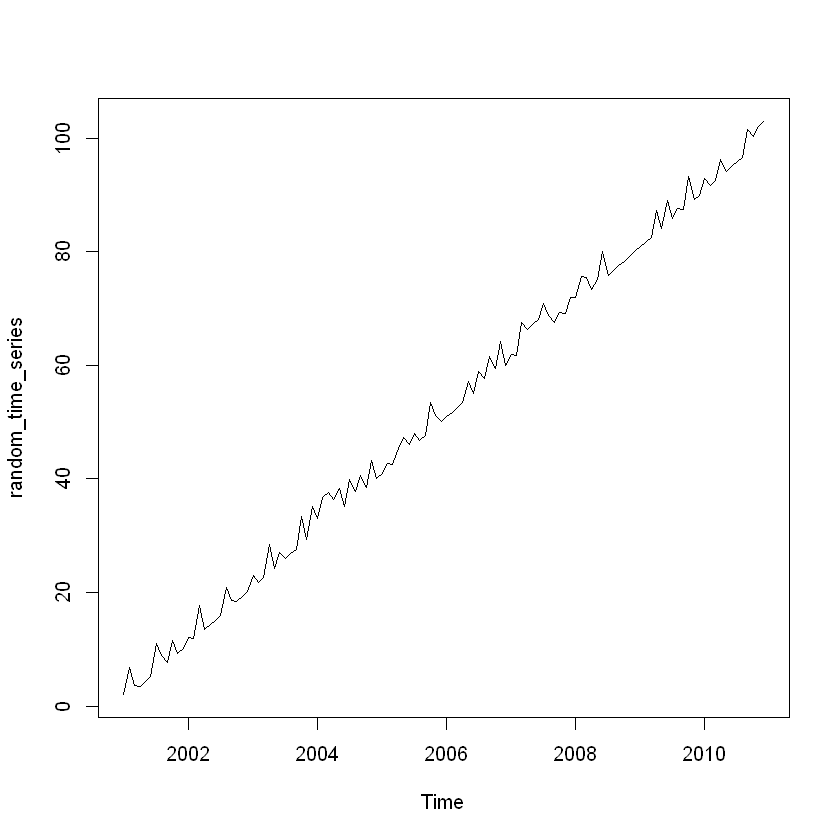

In [14]:
plot(random_time_series)

## 2020-07-18: When I first experimented with creating my own time series object, I used a multivariate matrix instead of a univariate matrix, which led to unexpected behavior.  Come back and document and example of doing that, with quarters instead of years to make it easier to see and understand.

## -Tyler

In [15]:
# Generate random monthly data over for ten years
random_data <- seq(1, 100, length.out=120) + sample(1:10) # Add a little random noise
# Convert our random data to a matrix
random_matrix <- matrix(random_data, nrow=10, byrow=TRUE)
rownames(random_matrix) <- as.character(seq(2001, 2010, length.out = 10))
colnames(random_matrix) <- c("January", "February", "March",
                      "April", "May", "June",
                      "July", "August", "September",
                      "October", "November", "December")
random_matrix

,January,February,March,April,May,June,July,August,September,October,November,December
2001,9.00000,11.83193,8.663866,4.495798,9.327731,12.15966,9.991597,9.823529,9.655462,17.48739,17.31933,20.15126
2002,16.98319,12.81513,17.647059,20.478992,18.310924,18.14286,17.974790,25.806723,25.638655,28.47059,25.30252,21.13445
2003,25.96639,28.79832,26.630252,26.462185,26.294118,34.12605,33.957983,36.789916,33.621849,29.45378,34.28571,37.11765
2004,34.94958,34.78151,34.613445,42.445378,42.277311,45.10924,41.941176,37.773109,42.605042,45.43697,43.26891,43.10084
2005,42.93277,50.76471,50.596639,53.428571,50.260504,46.09244,50.924370,53.756303,51.588235,51.42017,51.25210,59.08403
2006,58.91597,61.74790,58.579832,54.411765,59.243697,62.07563,59.907563,59.739496,59.571429,67.40336,67.23529,70.06723
2007,66.89916,62.73109,67.563025,70.394958,68.226891,68.05882,67.890756,75.722689,75.554622,78.38655,75.21849,71.05042
2008,75.88235,78.71429,76.546218,76.378151,76.210084,84.04202,83.873950,86.705882,83.537815,79.36975,84.20168,87.03361
2009,84.86555,84.69748,84.529412,92.361345,92.193277,95.02521,91.857143,87.689076,92.521008,95.35294,93.18487,93.01681
2010,92.84874,100.68067,100.512605,103.344538,100.176471,96.00840,100.840336,103.672269,101.504202,101.33613,101.16807,109.00000


In [16]:
random_time_series <- ts(random_matrix, start=c(2001, 1), frequency=12)

In [17]:
random_time_series

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,January,February,March,April,May,June,July,August,September,October,November,December
Jan 2001,9.00000,11.83193,8.663866,4.495798,9.327731,12.15966,9.991597,9.823529,9.655462,17.48739,17.31933,20.15126
Feb 2001,16.98319,12.81513,17.647059,20.478992,18.310924,18.14286,17.974790,25.806723,25.638655,28.47059,25.30252,21.13445
Mar 2001,25.96639,28.79832,26.630252,26.462185,26.294118,34.12605,33.957983,36.789916,33.621849,29.45378,34.28571,37.11765
Apr 2001,34.94958,34.78151,34.613445,42.445378,42.277311,45.10924,41.941176,37.773109,42.605042,45.43697,43.26891,43.10084
May 2001,42.93277,50.76471,50.596639,53.428571,50.260504,46.09244,50.924370,53.756303,51.588235,51.42017,51.25210,59.08403
Jun 2001,58.91597,61.74790,58.579832,54.411765,59.243697,62.07563,59.907563,59.739496,59.571429,67.40336,67.23529,70.06723
Jul 2001,66.89916,62.73109,67.563025,70.394958,68.226891,68.05882,67.890756,75.722689,75.554622,78.38655,75.21849,71.05042
Aug 2001,75.88235,78.71429,76.546218,76.378151,76.210084,84.04202,83.873950,86.705882,83.537815,79.36975,84.20168,87.03361
Sep 2001,84.86555,84.69748,84.529412,92.361345,92.193277,95.02521,91.857143,87.689076,92.521008,95.35294,93.18487,93.01681
Oct 2001,92.84874,100.68067,100.512605,103.344538,100.176471,96.00840,100.840336,103.672269,101.504202,101.33613,101.16807,109.00000


In [18]:
start(random_time_series)
end(random_time_series)
frequency(random_time_series)
deltat(random_time_series)

[1] 2001    1

[1] 2001   10

[1] 12

[1] 0.08333333

In [19]:
tsobj <- ts(as.vector(random_matrix), start=2001, end=2010, frequency=12)

In [20]:
random_matrix

,January,February,March,April,May,June,July,August,September,October,November,December
2001,9.00000,11.83193,8.663866,4.495798,9.327731,12.15966,9.991597,9.823529,9.655462,17.48739,17.31933,20.15126
2002,16.98319,12.81513,17.647059,20.478992,18.310924,18.14286,17.974790,25.806723,25.638655,28.47059,25.30252,21.13445
2003,25.96639,28.79832,26.630252,26.462185,26.294118,34.12605,33.957983,36.789916,33.621849,29.45378,34.28571,37.11765
2004,34.94958,34.78151,34.613445,42.445378,42.277311,45.10924,41.941176,37.773109,42.605042,45.43697,43.26891,43.10084
2005,42.93277,50.76471,50.596639,53.428571,50.260504,46.09244,50.924370,53.756303,51.588235,51.42017,51.25210,59.08403
2006,58.91597,61.74790,58.579832,54.411765,59.243697,62.07563,59.907563,59.739496,59.571429,67.40336,67.23529,70.06723
2007,66.89916,62.73109,67.563025,70.394958,68.226891,68.05882,67.890756,75.722689,75.554622,78.38655,75.21849,71.05042
2008,75.88235,78.71429,76.546218,76.378151,76.210084,84.04202,83.873950,86.705882,83.537815,79.36975,84.20168,87.03361
2009,84.86555,84.69748,84.529412,92.361345,92.193277,95.02521,91.857143,87.689076,92.521008,95.35294,93.18487,93.01681
2010,92.84874,100.68067,100.512605,103.344538,100.176471,96.00840,100.840336,103.672269,101.504202,101.33613,101.16807,109.00000


In [21]:
t(random_matrix)

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
January,9.000000,16.98319,25.96639,34.94958,42.93277,58.91597,66.89916,75.88235,84.86555,92.84874
February,11.831933,12.81513,28.79832,34.78151,50.76471,61.74790,62.73109,78.71429,84.69748,100.68067
March,8.663866,17.64706,26.63025,34.61345,50.59664,58.57983,67.56303,76.54622,84.52941,100.51261
April,4.495798,20.47899,26.46218,42.44538,53.42857,54.41176,70.39496,76.37815,92.36134,103.34454
May,9.327731,18.31092,26.29412,42.27731,50.26050,59.24370,68.22689,76.21008,92.19328,100.17647
June,12.159664,18.14286,34.12605,45.10924,46.09244,62.07563,68.05882,84.04202,95.02521,96.00840
July,9.991597,17.97479,33.95798,41.94118,50.92437,59.90756,67.89076,83.87395,91.85714,100.84034
August,9.823529,25.80672,36.78992,37.77311,53.75630,59.73950,75.72269,86.70588,87.68908,103.67227
September,9.655462,25.63866,33.62185,42.60504,51.58824,59.57143,75.55462,83.53782,92.52101,101.50420
October,17.487395,28.47059,29.45378,45.43697,51.42017,67.40336,78.38655,79.36975,95.35294,101.33613


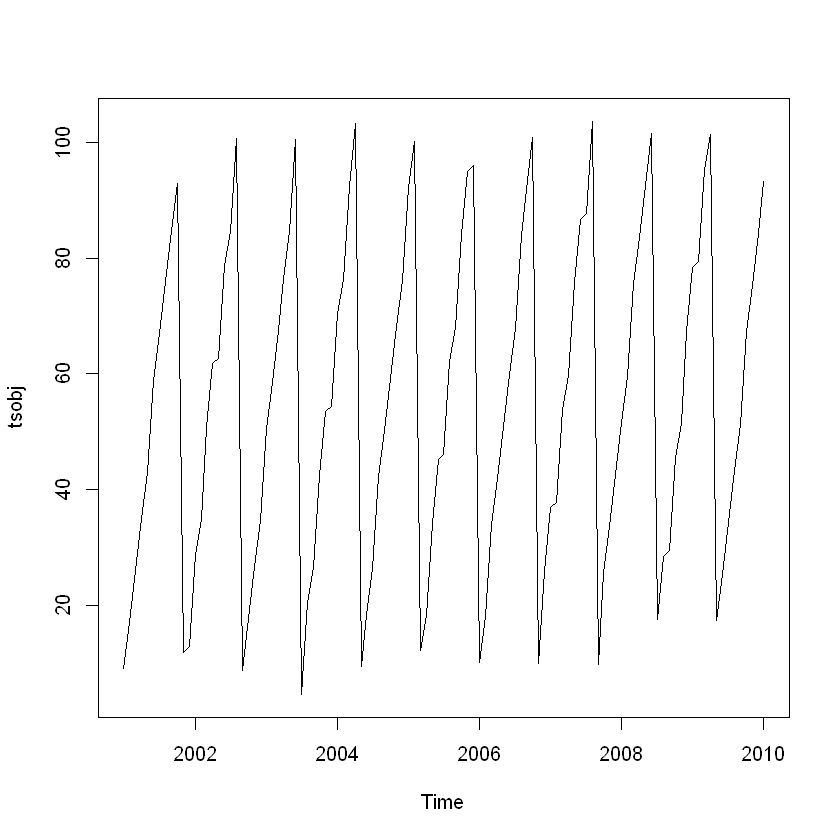

In [22]:
plot(tsobj)

In [23]:
# Generate random monthly data over for ten years
random_data <- seq(1, 100, length.out=120) + sample(1:10) # Add a little random noise
# Convert our random data to a matrix

random_data

[1]  10.000000   4.831933   8.663866   7.495798   6.327731  12.159664
  [7]  10.991597  16.823529   8.655462  16.487395  18.319328  13.151261
 [13]  16.983193  15.815126  14.647059  20.478992  19.310924  25.142857
 [19]  16.974790  24.806723  26.638655  21.470588  25.302521  24.134454
 [25]  22.966387  28.798319  27.630252  33.462185  25.294118  33.126050
 [31]  34.957983  29.789916  33.621849  32.453782  31.285714  37.117647
 [37]  35.949580  41.781513  33.613445  41.445378  43.277311  38.109244
 [43]  41.941176  40.773109  39.605042  45.436975  44.268908  50.100840
 [49]  41.932773  49.764706  51.596639  46.428571  50.260504  49.092437
 [55]  47.924370  53.756303  52.588235  58.420168  50.252101  58.084034
 [61]  59.915966  54.747899  58.579832  57.411765  56.243697  62.075630
 [67]  60.907563  66.739496  58.571429  66.403361  68.235294  63.067227
 [73]  66.899160  65.731092  64.563025  70.394958  69.226891  75.058824
 [79]  66.890756  74.722689  76.554622  71.386555  75.218487  74.050420
 [85]  72.882353  78.714286  77.546218  83.378151  75.210084  83.042017
 [91]  84.873950  79.705882  83.537815  82.369748  81.201681  87.033613
 [97]  85.865546  91.697479  83.529412  91.361345  93.193277  88.025210
[103]  91.857143  90.689076  89.521008  95.352941  94.184874 100.016807
[109]  91.848739  99.680672 101.512605  96.344538 100.176471  99.008403
[115]  97.840336 103.672269 102.504202 108.336134 100.168067 108.000000

In [24]:
random_time_series <- ts(random_data, frequency=12, start=2001, end=c(2010,12))
print(random_time_series)

            Jan        Feb        Mar        Apr        May        Jun
2001  10.000000   4.831933   8.663866   7.495798   6.327731  12.159664
2002  16.983193  15.815126  14.647059  20.478992  19.310924  25.142857
2003  22.966387  28.798319  27.630252  33.462185  25.294118  33.126050
2004  35.949580  41.781513  33.613445  41.445378  43.277311  38.109244
2005  41.932773  49.764706  51.596639  46.428571  50.260504  49.092437
2006  59.915966  54.747899  58.579832  57.411765  56.243697  62.075630
2007  66.899160  65.731092  64.563025  70.394958  69.226891  75.058824
2008  72.882353  78.714286  77.546218  83.378151  75.210084  83.042017
2009  85.865546  91.697479  83.529412  91.361345  93.193277  88.025210
2010  91.848739  99.680672 101.512605  96.344538 100.176471  99.008403
            Jul        Aug        Sep        Oct        Nov        Dec
2001  10.991597  16.823529   8.655462  16.487395  18.319328  13.151261
2002  16.974790  24.806723  26.638655  21.470588  25.302521  24.134454
2003  

In [25]:
start(random_time_series)
end(random_time_series)
frequency(random_time_series)
deltat(random_time_series)

[1] 2001    1

[1] 2010   12

[1] 12

[1] 0.08333333

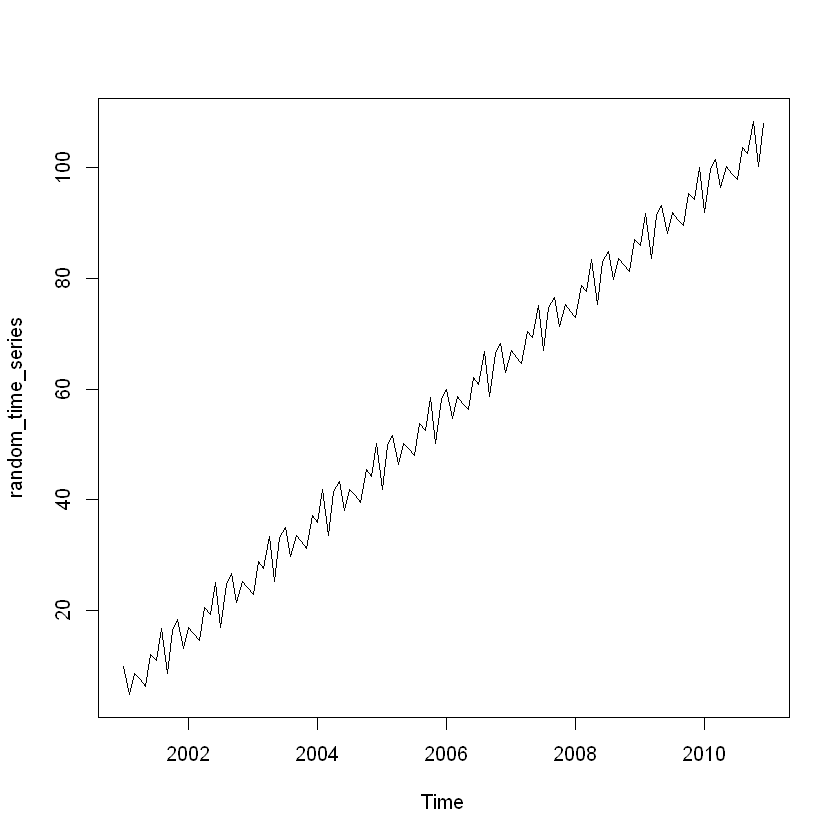

In [26]:
plot(random_time_series)